In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import boxcox

In [2]:
df_cmt = pd.read_csv("../data/cmt_2023-04-29.csv")
df_pst = pd.read_csv("../data/pst_2023-04-29.csv")

# explore comments dataset

## Issues in comments dataset

- Convert `"created_utc"` from float to datetime
- Rename columns 
- clean body from specail characters like `"r/", "\n", ...`
- remove permalink columns
- remove outliers in score column

In [3]:
df_cmt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4773 entries, 0 to 4772
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   comment_id   4773 non-null   object 
 1   post_id      4773 non-null   object 
 2   body         4773 non-null   object 
 3   author       4773 non-null   object 
 4   score        4773 non-null   int64  
 5   permalink    4773 non-null   object 
 6   created_utc  4773 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 261.1+ KB


In [11]:
df_cmt.select_dtypes('object').columns

Index(['comment_id', 'post_id', 'body', 'author', 'permalink'], dtype='object')

<Axes: >

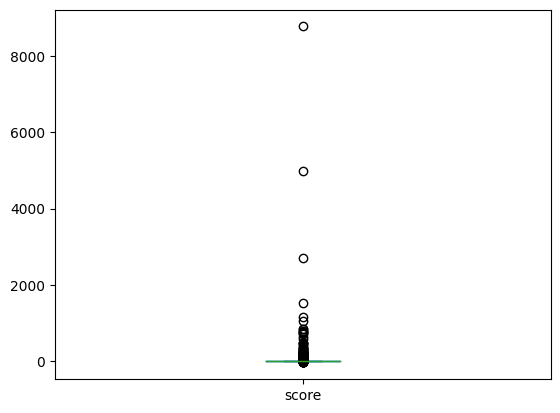

In [17]:
df_cmt.score.plot(kind="box")

<Axes: ylabel='Frequency'>

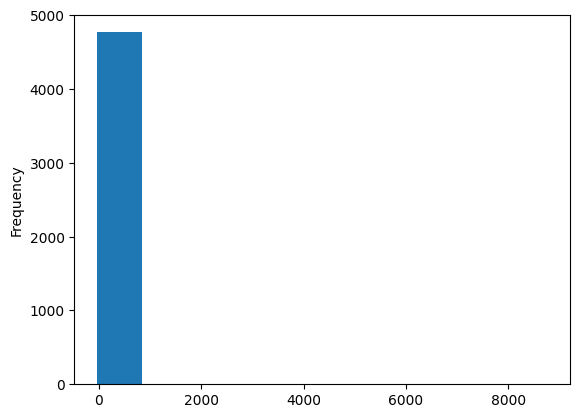

In [23]:
df_cmt.score.plot(kind="hist")

In [19]:
lower_quantile: float=0.05
upper_quantile: float=0.95

In [26]:
low, high = df_cmt['score'].quantile([lower_quantile, upper_quantile])
mask_outliers = df_cmt['score'].between(low, high)
df_cmt_new = df_cmt['score'][mask_outliers].to_frame()

In [27]:
df_cmt_new.shape

(4335, 1)

In [22]:
df_cmt.shape

(4773, 7)

<Axes: >

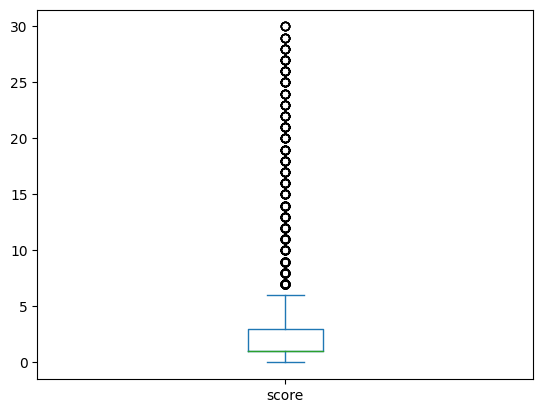

In [29]:
df_cmt_new.score.plot(kind="box")

In [34]:
df_cmt['score_log'] = np.log(df_cmt['score'])

/home/ay/.local/share/virtualenvs/DS_RedditEndToEnd-Hsd2Skab/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/ay/.local/share/virtualenvs/DS_RedditEndToEnd-Hsd2Skab/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [37]:
df_cmt['score_sqet'] = np.sqrt(df_cmt['score'])

/home/ay/.local/share/virtualenvs/DS_RedditEndToEnd-Hsd2Skab/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: ylabel='Frequency'>

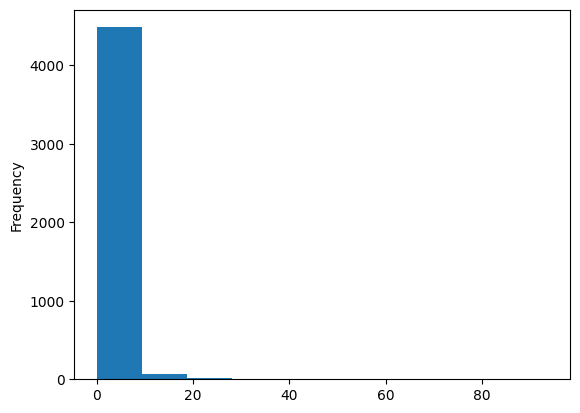

In [40]:
df_cmt.score_sqet.plot(kind="hist")

In [42]:
df_cmt.score.max(), df_cmt.score.min()

(8776, -39)

In [43]:
df_cmt.score.describe()

count    4773.000000
mean       12.693275
std       159.777261
min       -39.000000
25%         1.000000
50%         1.000000
75%         3.000000
max      8776.000000
Name: score, dtype: float64

In [50]:
pd.to_datetime(df_cmt['created_utc'], unit='s')

0      2023-04-28 20:56:01
1      2023-04-28 21:46:34
2      2023-04-28 23:22:46
3      2023-04-28 22:40:58
4      2023-04-28 21:00:55
               ...        
4768   2023-04-29 00:25:48
4769   2023-04-29 00:23:31
4770   2023-04-29 00:25:31
4771   2023-04-29 00:42:50
4772   2023-04-29 00:44:49
Name: created_utc, Length: 4773, dtype: datetime64[ns]

In [59]:
df_cmt.duplicated().sum()

0

In [60]:
df_cmt.isnull().sum()

comment_id       0
post_id          0
body             0
author           0
score            0
permalink        0
created_utc      0
score_log      202
score_sqet     202
dtype: int64

## Post dataset

## Issues for dataset posts
- convert created_utc from float to datetime
- remove permalink, subreddit_name_prefixed, subreddit_type, selftext
- sturcture link_flair_richtext

In [56]:
df_pst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   post_id                  459 non-null    object 
 1   title                    459 non-null    object 
 2   author                   459 non-null    object 
 3   subreddit                459 non-null    object 
 4   score                    459 non-null    int64  
 5   upvote_ratio             459 non-null    float64
 6   num_comments             459 non-null    int64  
 7   permalink                459 non-null    object 
 8   created_utc              459 non-null    float64
 9   url                      459 non-null    object 
 10  selftext                 231 non-null    object 
 11  subscribers              459 non-null    int64  
 12  over_18                  459 non-null    bool   
 13  link_flair_richtext      459 non-null    object 
 14  subreddit_name_prefixed  4

In [57]:
df_pst.head()

,post_id,title,author,subreddit,score,upvote_ratio,num_comments,permalink,created_utc,url,selftext,subscribers,over_18,link_flair_richtext,subreddit_name_prefixed,name,subreddit_type,ups,author_premium
0,1329jse,Study finds ChatGPT outperforms physicians in ...,shiruken,science,38726,0.81,1610,/r/science/comments/1329jse/study_finds_chatgp...,1.682715e+09,https://today.ucsd.edu/story/study-finds-chatg...,NaN,30000511,False,"[{'e': 'text', 't': 'Medicine'}]",r/science,t3_1329jse,public,38726,True
1,13267b2,The Book of Genesis in the style of Donald Trump…,tattedboi1_,ChatGPT,7850,0.96,289,/r/ChatGPT/comments/13267b2/the_book_of_genesi...,1.682708e+09,https://i.redd.it/uewkffncppwa1.jpg,NaN,1384721,False,"[{'e': 'text', 't': 'Funny '}]",r/ChatGPT,t3_13267b2,public,7850,True
2,132flto,"10,032 pieces of DNA missing from the human ge...",marketrent,science,3254,0.97,115,/r/science/comments/132flto/10032_pieces_of_dn...,1.682731e+09,https://english.elpais.com/science-tech/2023-0...,NaN,30000511,False,"[{'e': 'text', 't': 'Genetics'}]",r/science,t3_132flto,public,3254,True
3,1323qlg,GPT-4 Week 6. The first AI Political Ad + Pala...,lostlifon,ChatGPT,1946,0.97,262,/r/ChatGPT/comments/1323qlg/gpt4_week_6_the_fi...,1.682703e+09,https://www.reddit.com/r/ChatGPT/comments/1323...,Honestly I don't understand how things aren't ...,1384721,False,"[{'e': 'text', 't': 'Educational Purpose Only '}]",r/ChatGPT,t3_1323qlg,public,1946,True
4,132ft4n,Is this even normal?,MessierKatr,ChatGPT,1545,0.89,190,/r/ChatGPT/comments/132ft4n/is_this_even_normal/,1.682732e+09,https://i.redd.it/z0nmx5tbqrwa1.jpg,NaN,1384721,False,"[{'e': 'text', 't': 'Gone Wild '}]",r/ChatGPT,t3_132ft4n,public,1545,False


In [70]:
import ast

In [84]:
def get_value(x):
    x = ast.literal_eval(x)
    if len(x) != 0:
        return x[0]['t']
    return None

In [85]:
df_pst['flair'] = df_pst['link_flair_richtext'].apply(get_value)

In [86]:
df_pst.query('link_flair_richtext == "[]"')

,post_id,title,author,subreddit,score,upvote_ratio,num_comments,permalink,created_utc,url,selftext,subscribers,over_18,link_flair_richtext,subreddit_name_prefixed,name,subreddit_type,ups,author_premium,flair
148,132z36v,Meeting in an hour! Questions for a CEO of a b...,gneev,data,2,1.00,1,/r/data/comments/132z36v/meeting_in_an_hour_qu...,1.682783e+09,https://www.reddit.com/r/data/comments/132z36v...,I'm currently working as a Business Analyst fo...,28453,False,[],r/data,t3_132z36v,public,2,False,None
265,132d0nk,Comprehensive home system and appliance data sets,SufficientPlay2065,data,1,1.00,0,/r/data/comments/132d0nk/comprehensive_home_sy...,1.682724e+09,https://www.reddit.com/r/data/comments/132d0nk...,"Hi Everyone,\n\nI'm trying to find centralized...",28453,False,[],r/data,t3_132d0nk,public,1,False,None
391,132xg4m,Alpha Plugins question,nurgazik,ChatGPT,0,0.33,3,/r/ChatGPT/comments/132xg4m/alpha_plugins_ques...,1.682781e+09,https://i.redd.it/jsh706k7svwa1.jpg,Got my access to plugins today.\n\nTwo questio...,1384717,False,[],r/ChatGPT,t3_132xg4m,public,0,False,None


In [88]:
df_pst.duplicated().sum()

0

In [89]:
df_pst.duplicated().isnull().sum()

0

In [90]:
df_pst.select_dtypes('number').columns

Index(['score', 'upvote_ratio', 'num_comments', 'created_utc', 'subscribers',
       'ups'],
      dtype='object')

<Axes: >

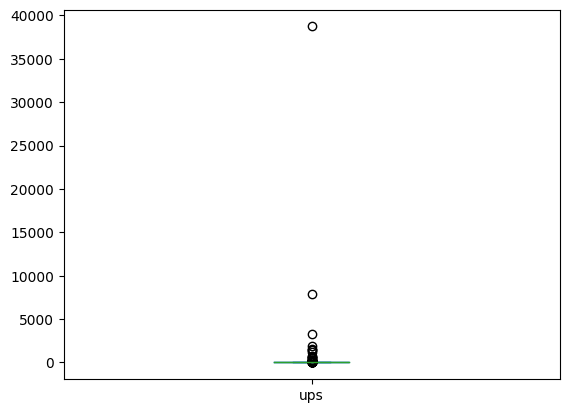

In [97]:
df_pst['ups'].plot(kind='box')

In [98]:
df_pst.shape

(459, 20)

In [114]:
import inspect

def get_invoked_functions(obj):
    functions = []
    for name, method in inspect.getmembers(obj, predicate=inspect.ismethod):
        if hasattr(method, "__self__") and isinstance(method.__self__, obj.__class__):
            functions.append(name)
    return functions

In [117]:
class Myclass:
    def tt(self):
        print("hhhh")
    def jj(self):
        print("FFFF")

myclassd = Myclass()
myclassd.tt()


invoked_methods = get_invoked_functions(myclassd)
print(invoked_methods)

hhhh
['jj', 'tt']


In [129]:
import re

text = "This is\na \rtext rwith\a multiple/r occurren/rces of\nthese characters."

pattern = r"[\n\r\a]+|/r"

clean_text = re.sub(pattern, " ", text)

print(clean_text)

This is a  text  with  multiple  occu en ces of these cha acte s.


In [125]:
import re

text = "Hello\rworld!\nThis is a test./rAnother line"

# Replace \n, \a, \r, but not /r
pattern = r"(?<!/)\\"
clean_text = re.sub(pattern, " ", text)

print(clean_text)
# Output: Hello world! This is a test.r Another line


world!
This is a test./rAnother line
